In [1]:
import deepxde as dde
import numpy as np 
import matplotlib.pyplot as plt 

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


**1. Phương trình truyền nhiệt 1D trên đĩa tròn với điều kiện biên Dirichlet**

In [62]:
radius = 1.0
geom = dde.geometry.Disk([0.0, 0.0], radius)
timedomain = dde.geometry.TimeDomain(0, 1.0)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

alpha = 0.01  # hệ số dẫn nhiệt

def pde(x, u):
    du_t = dde.grad.jacobian(u, x, i=0, j=2)
    du_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)
    return du_t - alpha * (du_xx + du_yy)

def initial_condition(x):
    r2 = x[:, 0]**2 + x[:, 1]**2
    return np.exp(-r2 / 0.01)  # Gaussian centered at origin

ic = dde.IC(geomtime, initial_condition, lambda x, on_initial: on_initial)

def boundary(x, on_boundary):
    return on_boundary

bc = dde.DirichletBC(geomtime, lambda x: 0.0, boundary)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [ic, bc],
    num_domain=2000,
    num_boundary=300,
    num_initial=300,
    num_test=1000,
)

net = dde.maps.FNN([3] + [60] * 3 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(epochs=10000)


Compiling model...
Building feed-forward neural network...
'build' took 0.096604 s

'compile' took 1.260739 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.35e-01, 1.40e-02, 9.25e-02]    [2.28e-01, 1.40e-02, 9.25e-02]    []  
1000      [6.41e-06, 5.08e-03, 1.28e-05]    [4.73e-06, 5.08e-03, 1.28e-05]    []  
2000      [3.48e-06, 5.08e-03, 6.01e-06]    [2.55e-06, 5.08e-03, 6.01e-06]    []  
3000      [2.26e-06, 5.08e-03, 4.21e-06]    [1.65e-06, 5.08e-03, 4.21e-06]    []  
4000      [1.79e-06, 5.08e-03, 5.12e-06]    [1.28e-06, 5.08e-03, 5.12e-06]    []  
5000      [2.28e-05, 5.08e-03, 4.24e-05]    [2.36e-05, 5.08e-03, 4.24e-05]    []  
6000      [1.98e-06, 5.08e-03, 4.00e-06]    [1.41e-06, 5.08e-03, 4.00e-06]    []  
7000      [1.84e-06, 5.08e-03, 4.02e-06]    [1.31e-06, 5.08e-03, 4.02e-06]    []  
8000      [1.84e-06, 5.08e-03, 3.99e-06]    [1.32e-06, 5.08e-03, 3.99e-06]    []  
9000      [1.66e-05, 5.09e-03, 3.

(<deepxde.model.LossHistory at 0x1b1efe559a0>,
 <deepxde.model.TrainState at 0x1b1efe9fa70>)

Saving loss history to c:\Users\Admin\AppData\Local\Programs\Microsoft VS Code\loss.dat ...
Saving training data to c:\Users\Admin\AppData\Local\Programs\Microsoft VS Code\train.dat ...
Saving test data to c:\Users\Admin\AppData\Local\Programs\Microsoft VS Code\test.dat ...


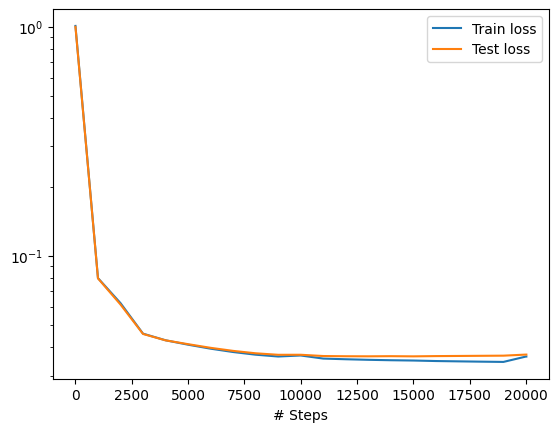

In [63]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

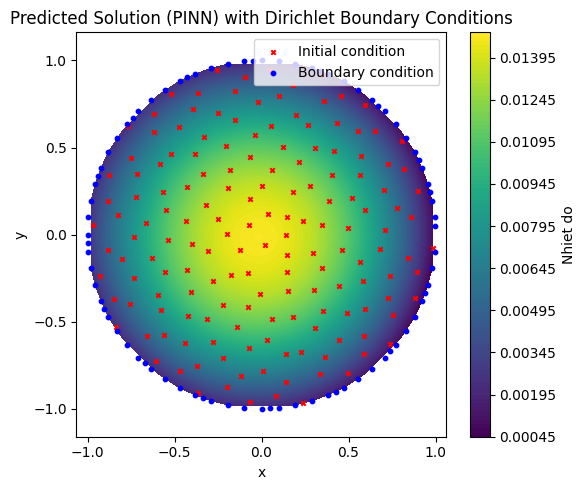

In [64]:
N = 100
x = np.linspace(-radius, radius, N)
y = np.linspace(-radius, radius, N)
X, Y = np.meshgrid(x, y)
X_flat = X.flatten()
Y_flat = Y.flatten()

mask = X_flat**2 + Y_flat**2 <= radius**2
x_in_disk = X_flat[mask]
y_in_disk = Y_flat[mask]
t_val = np.full_like(x_in_disk, 1.0)

X_test = np.stack([x_in_disk, y_in_disk, t_val], axis=1)
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 5))
plt.tricontourf(x_in_disk, y_in_disk, y_pred.flatten(), 100, cmap="viridis")
plt.colorbar(label="Nhiet do")

plt.scatter(X_ic_xy[:, 0], X_ic_xy[:, 1], c="red", s=10, label="Initial condition", marker = "x")
plt.scatter(X_bc_xy[:, 0], X_bc_xy[:, 1], c="blue", s=10, label="Boundary condition")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predicted Solution (PINN) with Dirichlet Boundary Conditions")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()

**2. Phương trình truyền nhiệt 1D với điều kiện biên Neumann**

In [ ]:
radius = 1.0
geom = dde.geometry.Disk([0.0, 0.0], radius)
timedomain = dde.geometry.TimeDomain(0, 1.0)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

alpha = 0.01  # hệ số dẫn nhiệt

def pde(x, u):
    du_t = dde.grad.jacobian(u, x, i=0, j=2)
    du_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)
    return du_t - alpha * (du_xx + du_yy)

def initial_condition(x):
    r2 = x[:, 0]**2 + x[:, 1]**2
    return np.exp(-r2 / 0.01)  # Gaussian centered at origin

ic = dde.IC(geomtime, initial_condition, lambda x, on_initial: on_initial)

def boundary(x, on_boundary):
    return on_boundary

bc = dde.NeumannBC(geomtime, lambda x: -0.01, boundary)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [ic, bc],
    num_domain=2000,
    num_boundary=300,
    num_initial=300,
    num_test=1000,
)

net = dde.maps.FNN([3] + [60] * 3 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(epochs=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.085774 s

'compile' took 1.130203 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.35e-01, 1.40e-02, 1.25e-02]    [2.31e-01, 1.40e-02, 1.25e-02]    []  
1000      [8.02e-07, 5.07e-03, 8.23e-07]    [8.09e-07, 5.07e-03, 8.23e-07]    []  
2000      [4.41e-07, 5.07e-03, 5.97e-07]    [4.29e-07, 5.07e-03, 5.97e-07]    []  
3000      [2.73e-07, 5.07e-03, 4.37e-07]    [2.54e-07, 5.07e-03, 4.37e-07]    []  
4000      [4.17e-07, 5.07e-03, 6.41e-07]    [4.25e-07, 5.07e-03, 6.41e-07]    []  
5000      [1.23e-07, 5.07e-03, 2.60e-07]    [1.04e-07, 5.07e-03, 2.60e-07]    []  
6000      [1.40e-07, 5.07e-03, 2.23e-06]    [1.27e-07, 5.07e-03, 2.23e-06]    []  
7000      [5.73e-08, 5.07e-03, 2.02e-07]    [4.18e-08, 5.07e-03, 2.02e-07]    []  
8000      [4.88e-08, 5.07e-03, 1.97e-07]    [3.71e-08, 5.07e-03, 1.97e-07]    []  
9000      [1.98e-07, 5.07e-03, 2.

(<deepxde.model.LossHistory at 0x1b1f9819cd0>,
 <deepxde.model.TrainState at 0x1b1f98182c0>)

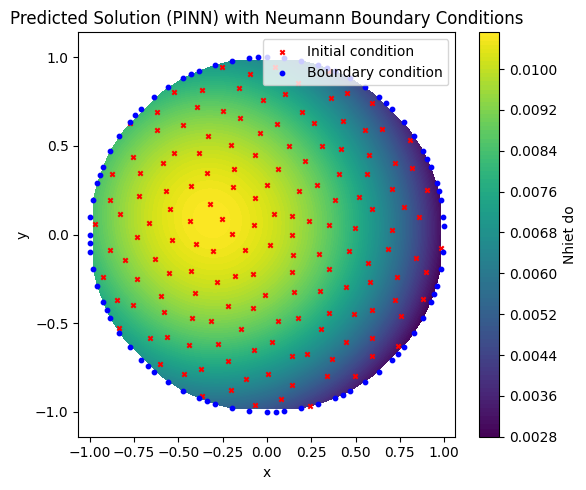

In [ ]:
N = 100
x = np.linspace(-radius, radius, N)
y = np.linspace(-radius, radius, N)
X, Y = np.meshgrid(x, y)
X_flat = X.flatten()
Y_flat = Y.flatten()

# Lọc các điểm nằm trong hình tròn
mask = X_flat**2 + Y_flat**2 <= radius**2
x_in_disk = X_flat[mask]
y_in_disk = Y_flat[mask]
t_val = np.full_like(x_in_disk, 1.0)

X_test = np.stack([x_in_disk, y_in_disk, t_val], axis=1)
y_pred = model.predict(X_test)


plt.figure(figsize=(6, 5))
plt.tricontourf(x_in_disk, y_in_disk, y_pred.flatten(), 100, cmap="viridis")
plt.colorbar(label="Nhiet do")


plt.scatter(X_ic_xy[:, 0], X_ic_xy[:, 1], c="red", s=10, label="Initial condition", marker = "x")
plt.scatter(X_bc_xy[:, 0], X_bc_xy[:, 1], c="blue", s=10, label="Boundary condition")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predicted Solution (PINN) with Neumann Boundary Conditions")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()